In [109]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
from numba import jit

In [115]:
BLUR_BODY_DATA_PATH = "data/BlurBody" 
IRONMAN_DATA_PATH = "data/Ironman" 
DOG_DATA_PATH = "data/Dog" 
SURFER_DATA_PATH = "data/Surfer" 
WALKING_DATA_PATH = "data/Walking" 


In [116]:
def read_data(data_path, sep='\t'):
    boxes = pd.read_csv(f"{data_path}/groundtruth_rect.txt", sep=sep, header=None)
    frames = list(sorted(os.listdir(f"{data_path}/img/")))
    return frames, boxes 

In [120]:
DATA_PATH = DOG_DATA_PATH
frames, boxes = read_data(DATA_PATH)

In [121]:
frame = cv.imread(f"{DATA_PATH}/img/{frames[0]}")
x, y, w, h = boxes.iloc[0]

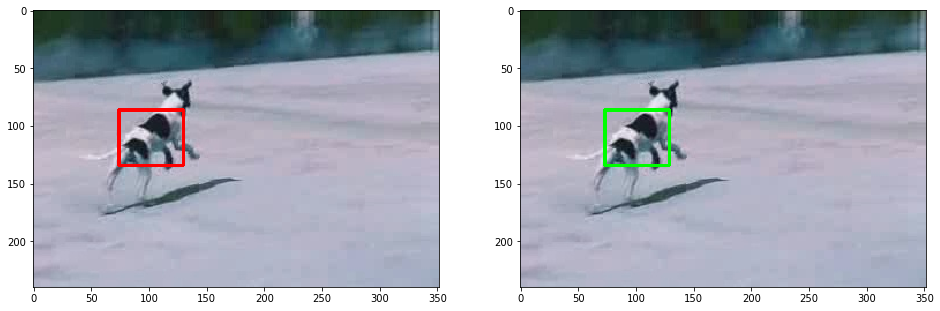

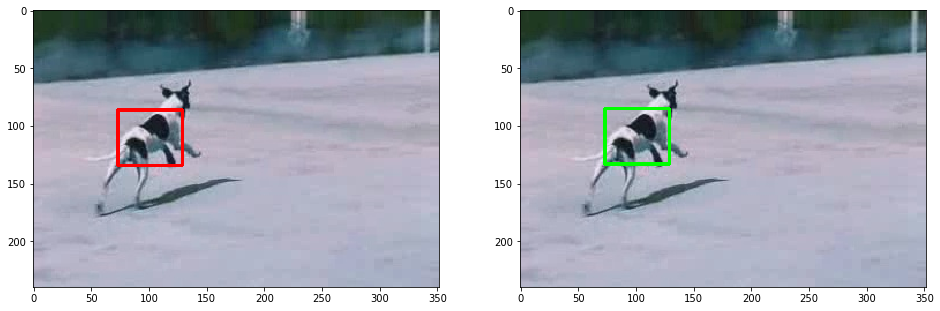

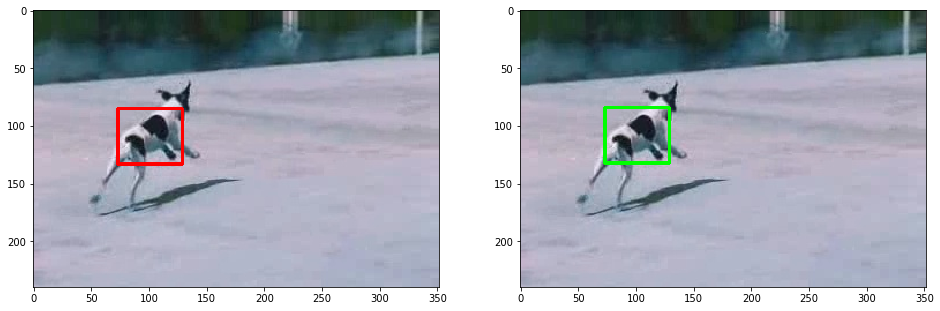

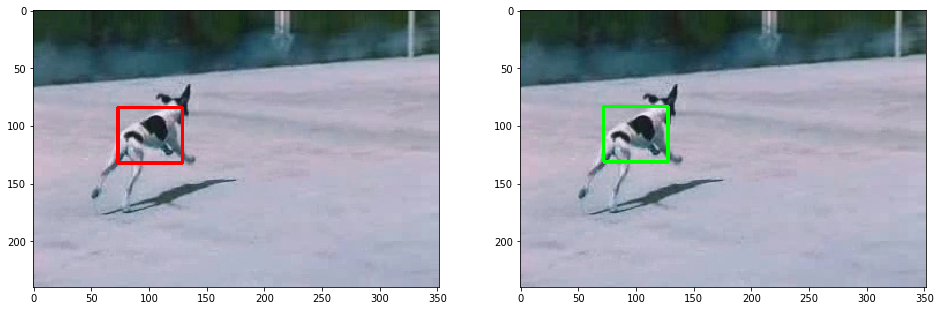

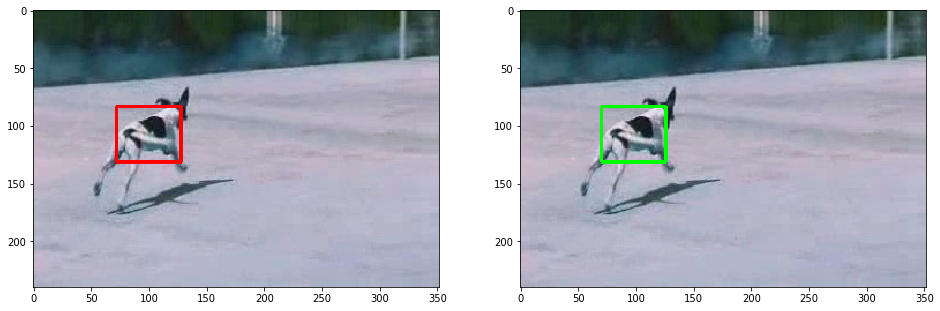

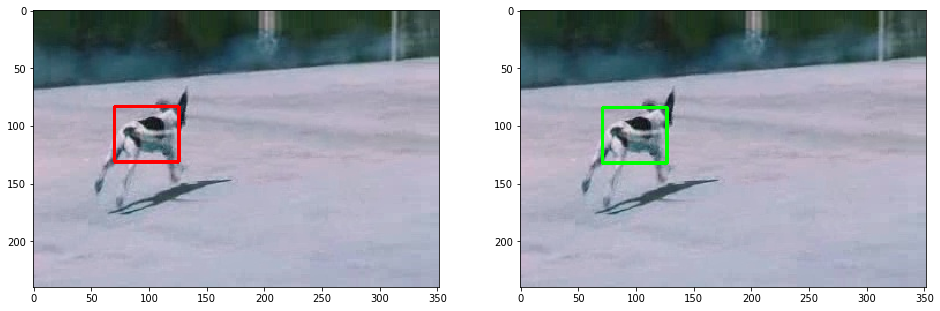

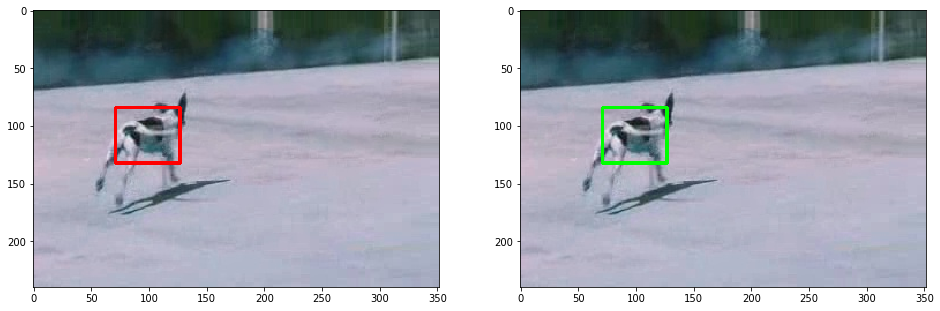

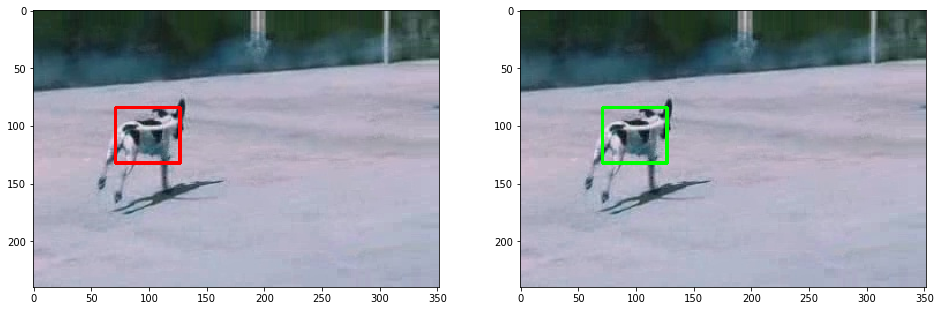

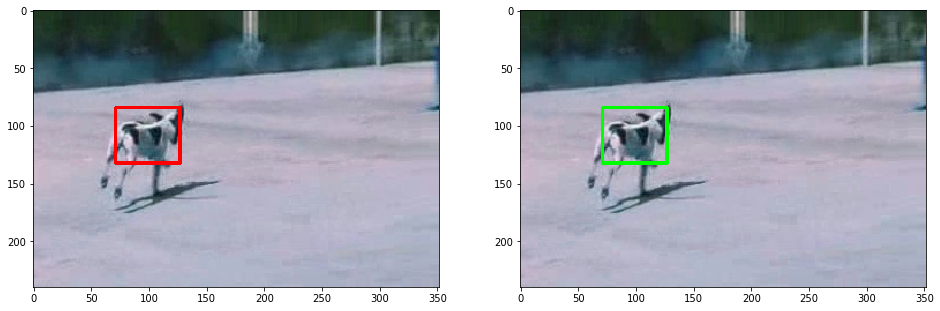

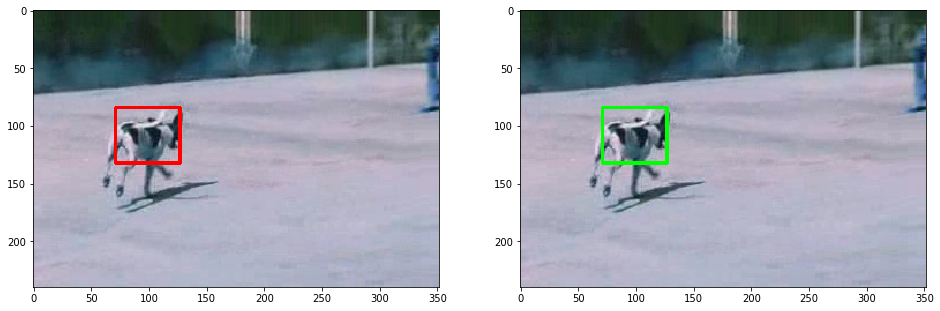

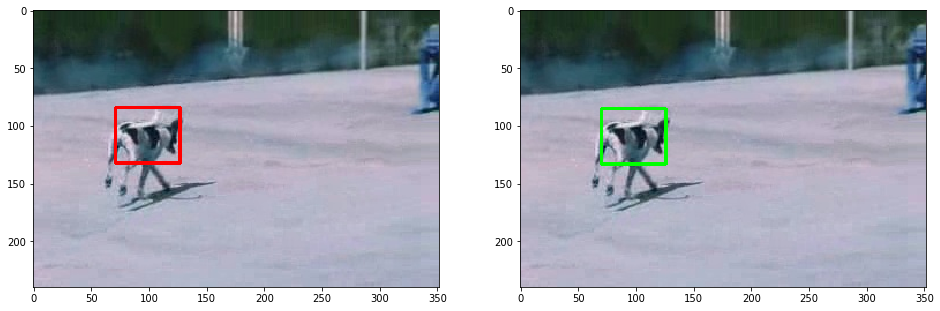

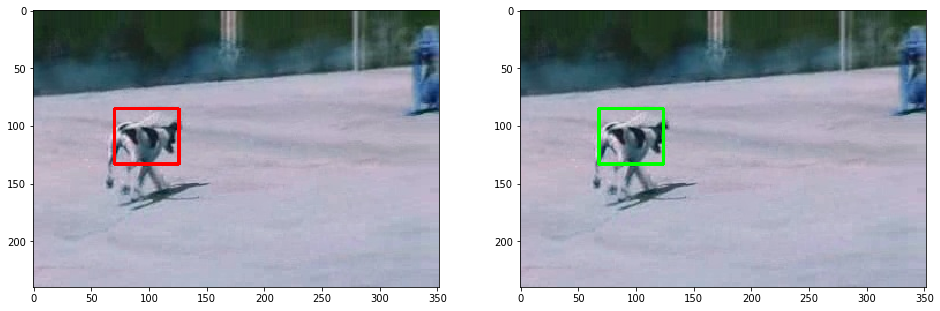

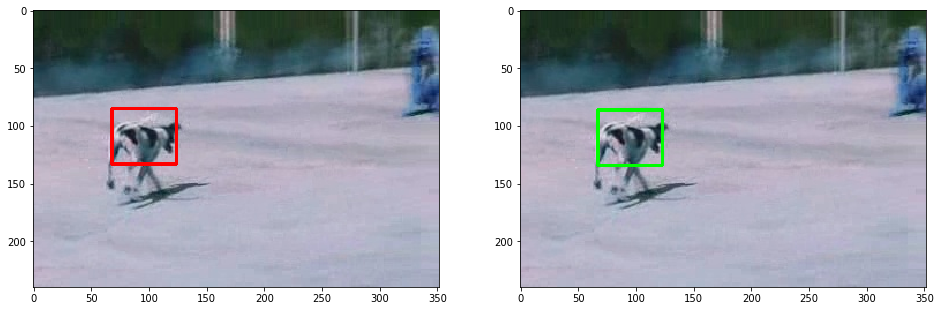

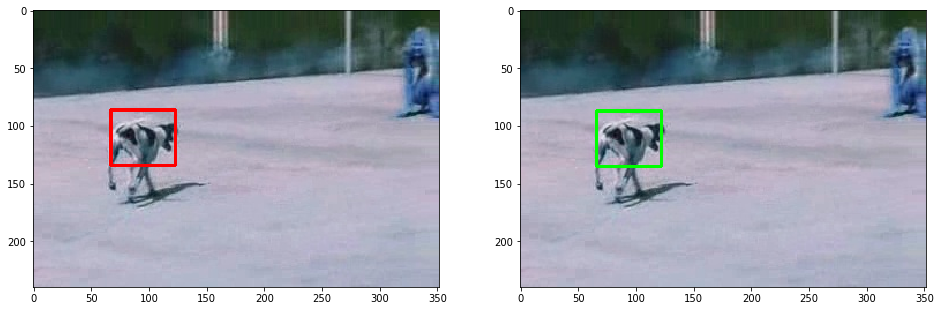

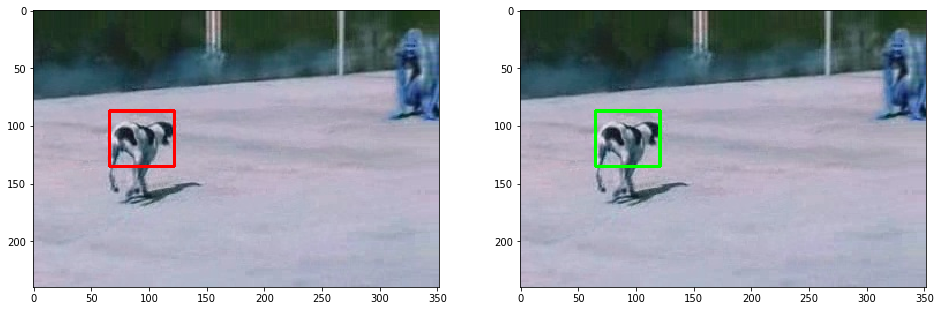

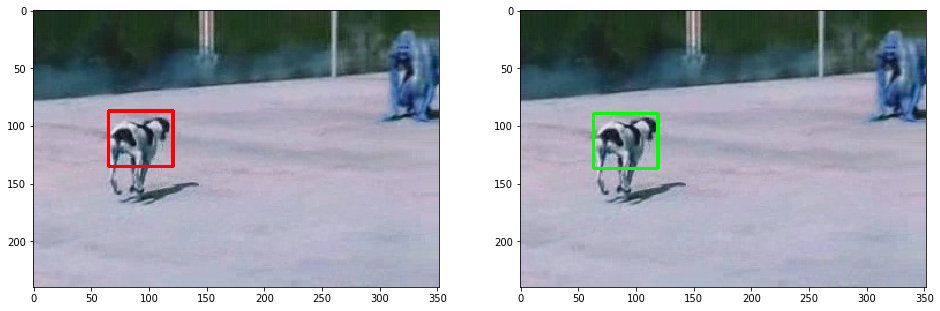

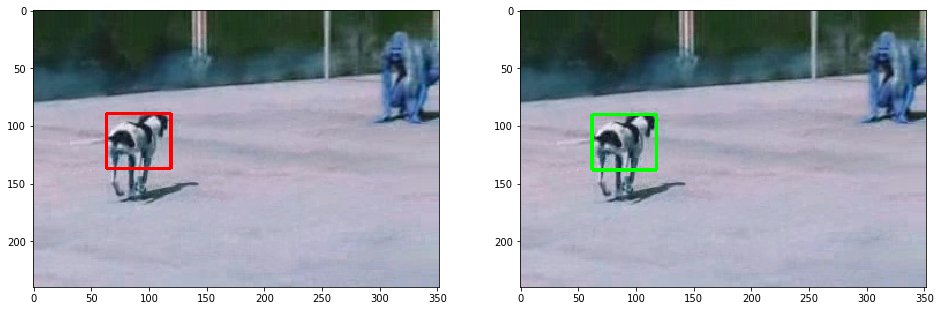

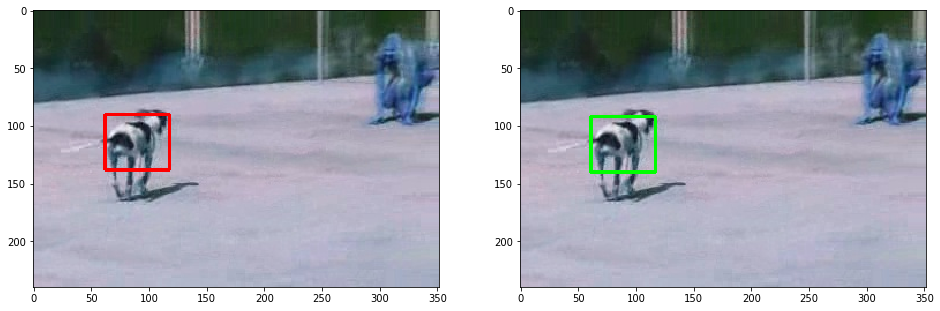

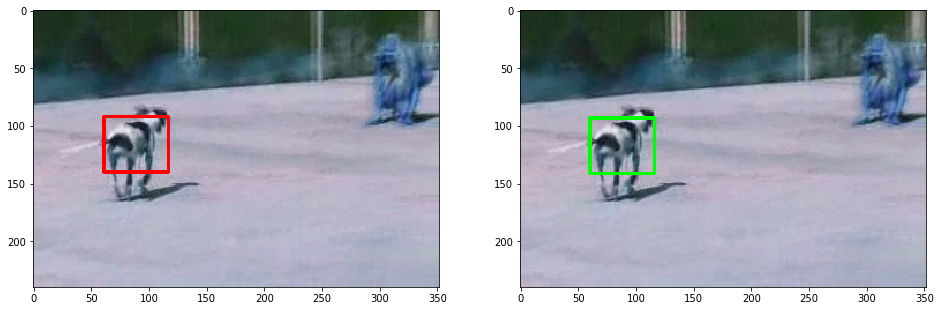

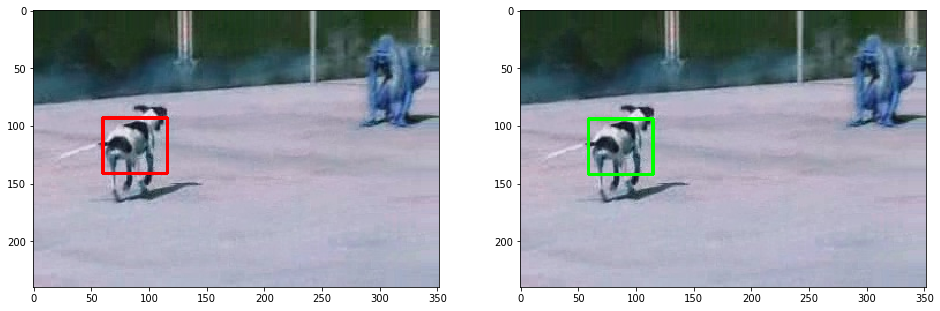

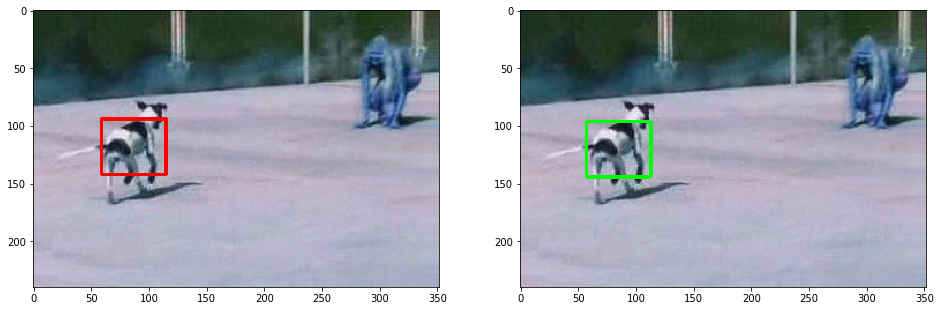

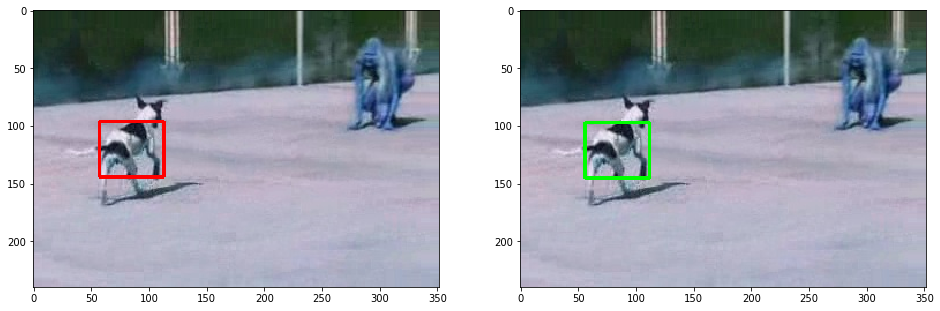

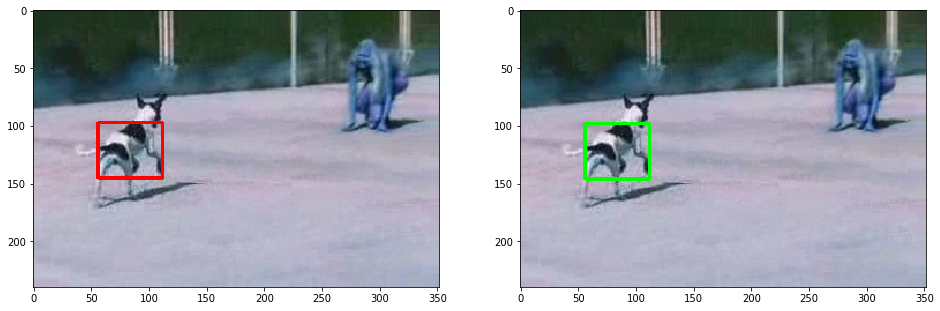

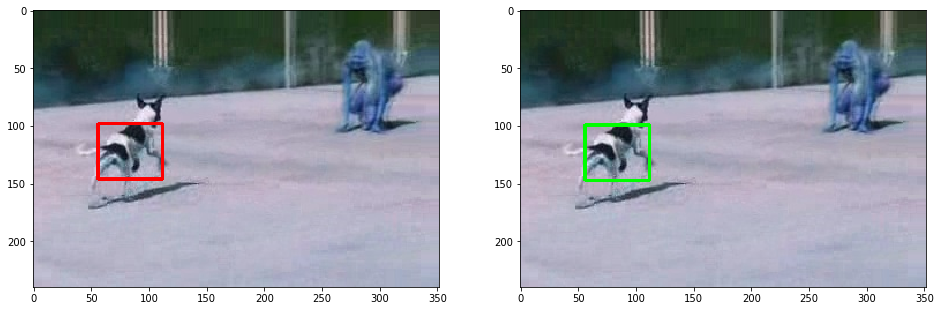

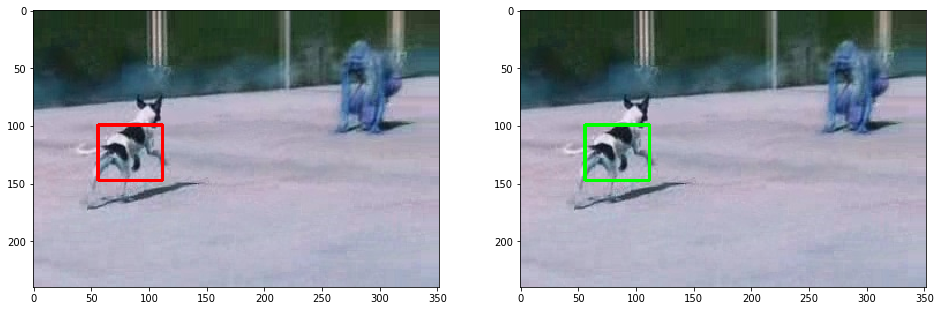

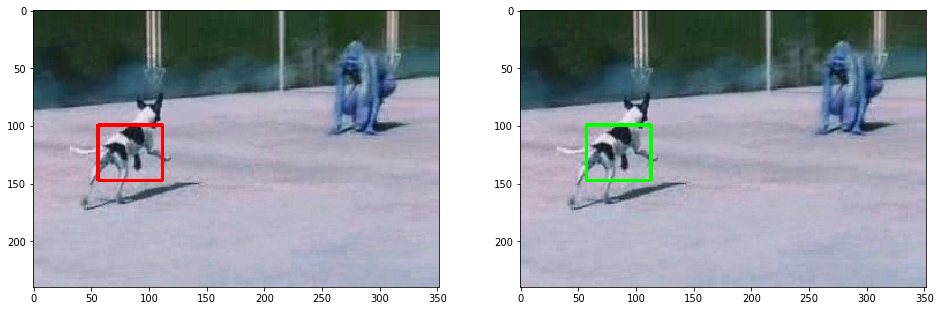

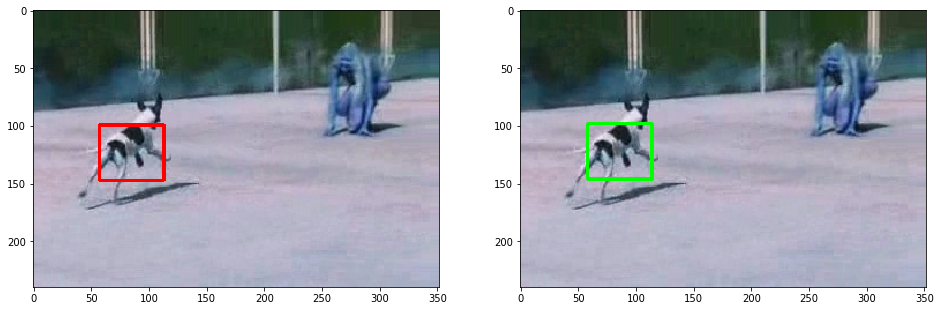

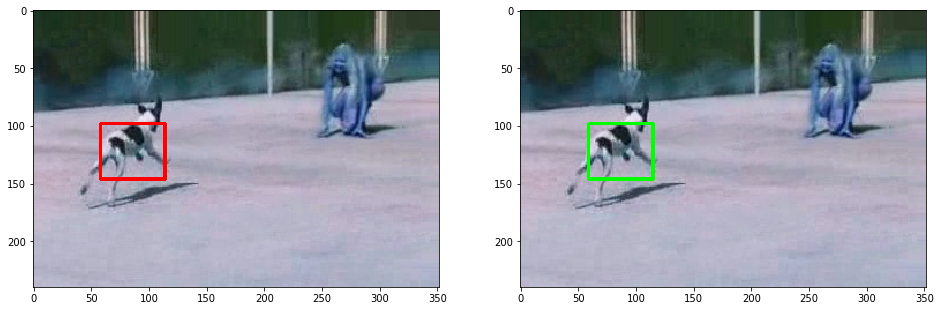

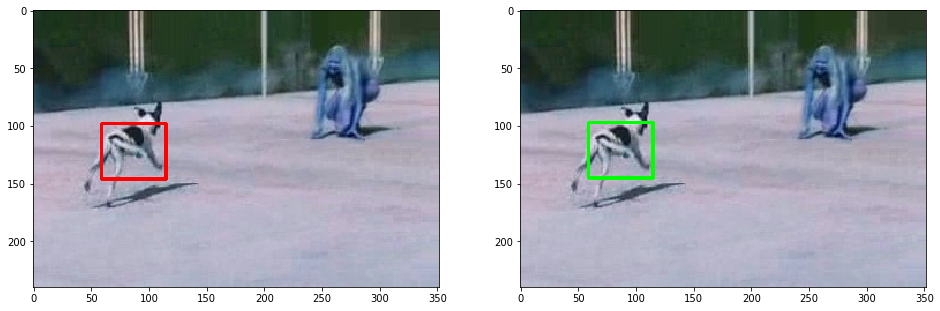

In [122]:
old_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
# Lucas kanade params
lk_params = dict(winSize = (50, 50),
                 maxLevel = 4,
                 criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
point = (x, y)
point_selected = True
old_points = np.array([[x, y]], dtype=np.float32)        
for i in range(1, 30):
    frame = cv.imread(f"{DATA_PATH}/img/{frames[i]}")
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    if point_selected is True:
        old = cv.rectangle(frame.copy(), (x, y), (x+w, y+h), (255, 0, 0), 2)
        new_points, status, error = cv.calcOpticalFlowPyrLK(old_gray, gray_frame, old_points, None, **lk_params)
        old_gray = gray_frame.copy()
        old_points = new_points
        new_points = new_points.astype(int)
        x, y = new_points.ravel()
        new = cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(old)
    plt.subplot(1, 2, 2)
    plt.imshow(new)
    plt.show()
